# INFS770
## Assignment 1
### Kevin Kuipers 
#### 2/18/2020

## Task 2)

##### This data set comes UCI Machining learning repository. I am not the owner or contributor of this data set. The description, owner(s), and contributor(s) can be found here: 

##### I will begin by loading this public data set into python. I downloaded it from the site and calling it from my hard drive. The variable names are not given within the data set therefore,  will create a list and import into the dataset. I will also output the first five rows to make sure it looks correct.



In [2]:
import pandas as pd
import numpy as np


df = 'magic04.data'

var_names = [
    
'fLength', #: continuous # major axis of ellipse [mm]
'fWidth', #: continuous # minor axis of ellipse [mm]
'fSize', #: continuous # 10-log of sum of content of all pixels [in #phot]
'fConc', #: continuous # ratio of sum of two highest pixels over fSize [ratio]
'fConc1', #: continuous # ratio of highest pixel over fSize [ratio]
'fAsym', #: continuous # distance from highest pixel to center, projected onto major axis [mm]
'fM3Long', #: continuous # 3rd root of third moment along major axis [mm]
'fM3Trans', #: continuous # 3rd root of third moment along minor axis [mm]
'fAlpha', #: continuous # angle of major axis with vector to origin [deg]
'fDist', #: continuous # distance from origin to center of ellipse [mm]
'class' #: g,h # gamma (signal), hadron (background)
]
df = pd.read_csv(df, sep=',', names = var_names)

df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


##### The headers are correct. And now I will look at the data types of the variables.

In [3]:
df.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object

# Data Exploration

##### Now lets at the histograms of each variable. 

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D6D093908>,
      dtype=object)

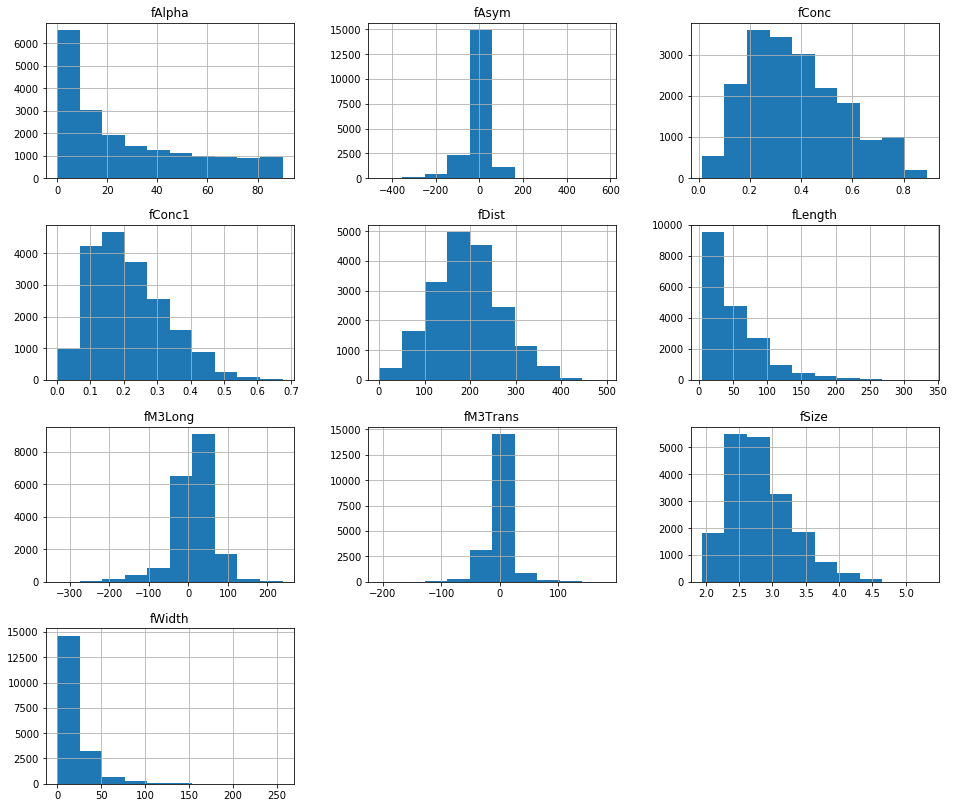

In [5]:
df.hist(figsize=(16,14))

### Summary Statistics

##### Now I will look at the variables summary statistics using the describe() method. I will also look at the volue counts for the categorical variables using the value_counts() method.

In [6]:
for var_names in var_names:
    print("-"*50)
    print(var_names)
    if df[var_names].dtype == object:
        print(df[var_names].value_counts())
    else:
        print(df[var_names].describe)

--------------------------------------------------
fLength
<bound method NDFrame.describe of 0         28.7967
1         31.6036
2        162.0520
3         23.8172
4         75.1362
5         51.6240
6         48.2468
7         26.7897
8         96.2327
9         46.7619
10        62.7766
11        18.8562
12        45.6321
13        33.1818
14        60.4580
15        29.4741
16        36.1741
17        46.2915
18        46.0588
19        44.7394
20        91.6423
21        86.0486
22        90.5299
23        20.3836
24        87.2384
25       107.3380
26        27.2304
27        26.7065
28        23.5647
29        34.7486
           ...   
18990     26.0277
18991     32.1547
18992    169.0402
18993     18.8377
18994    195.2309
18995     67.7139
18996     29.8353
18997     18.0124
18998    207.2530
18999    172.2442
19000     69.3556
19001     57.1905
19002    110.7140
19003     21.5189
19004     23.4293
19005     23.8277
19006     32.1454
19007    115.2640
19008    133.4950
19009  

##### Now I am going to recode the target variable using 1 for g and 2 for h. The header name will also be renamed from class to target. Then I will look at a heatmap of the correlation coefficients to see if there is correlations between any of the variables.

In [7]:
df2 = df.copy()

In [8]:
def code(target):
    if target == 'g':
        return 1
    elif target == 'h':
        return 0
    

df2['target']=df2['class'].apply(code)

df2.pop('class')


0        g
1        g
2        g
3        g
4        g
5        g
6        g
7        g
8        g
9        g
10       g
11       g
12       g
13       g
14       g
15       g
16       g
17       g
18       g
19       g
20       g
21       g
22       g
23       g
24       g
25       g
26       g
27       g
28       g
29       g
        ..
18990    h
18991    h
18992    h
18993    h
18994    h
18995    h
18996    h
18997    h
18998    h
18999    h
19000    h
19001    h
19002    h
19003    h
19004    h
19005    h
19006    h
19007    h
19008    h
19009    h
19010    h
19011    h
19012    h
19013    h
19014    h
19015    h
19016    h
19017    h
19018    h
19019    h
Name: class, Length: 19020, dtype: object

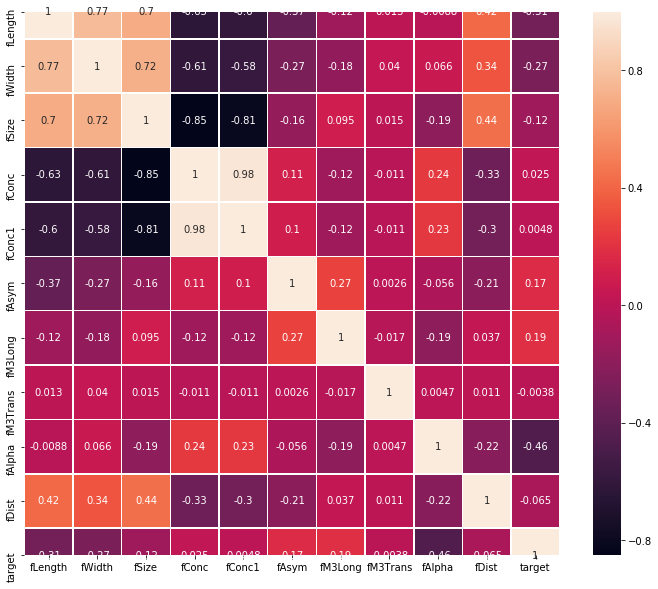

In [9]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df2.corr(), ax=ax, linewidths=-0.5, annot=True)
plt.show()

##### It appears there are not really any strong correlation between the features and the target. However, there are some features that strong correlated amongst themselves. For example fConc1 and fConc. 

### Train Test Split

##### Next the data set will be split into two portions. One will be the training set and the other will be the validation data set. The training set will be used to develop models and then test them against the validation data set. For this split the training set will contain 65% of the data and the validation data set will contain the remaining 35% of the data. 

##### I will create two splits one containing binary target variable and one with no coding for the target variable.

In [10]:
df.head()
from sklearn.model_selection import train_test_split

#Grabbing all the features of the data set and dropping the target variable
X = df.drop(columns=['class'])
#grabbing only the target variable
y = df[['class']]


#Train test split. Test is 35%
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=725)

In [11]:
df.head()
from sklearn.model_selection import train_test_split

#Grabbing all the features of the data set and dropping the target variable
X = df2.drop(columns=['target'])
#grabbing only the target variable
y = df2[['target']]


#Train test split. Test is 35%
x2_train, x2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.35, random_state=725)

In [12]:
from sklearn.linear_model import LogisticRegression
log_mod = LogisticRegression(solver='lbfgs',max_iter=1000)
log_mod.fit(x2_train,y2_train.values.ravel())


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y2_pred=log_mod.predict(x2_test)

from sklearn import metrics
from sklearn.metrics import classification_report

for line in classification_report(y2_test, y2_pred).split("\n"):
    print(line)


              precision    recall  f1-score   support

           0       0.75      0.58      0.66      2396
           1       0.79      0.89      0.84      4261

    accuracy                           0.78      6657
   macro avg       0.77      0.74      0.75      6657
weighted avg       0.78      0.78      0.77      6657



##### It appears the using the logistic regression classifier with max.iter at 1000 the accuracy comes out to 79%. The reason I did not use the default value was becuase I received a warning sign that maxium convergence has not occured.

### ROC Graph
##### Lets look at the AUC to see how the model looks between false positive rate and true positive rate. 

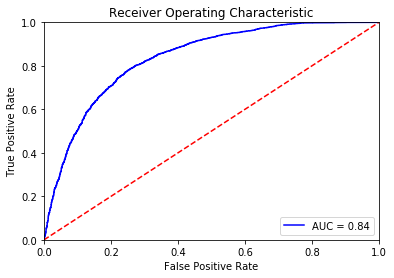

In [14]:
import sklearn.metrics as metrics
probs = log_mod.predict_proba(x2_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1] , [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Scaling the Data

##### Before fitting the SVM model, SVM classifiers work better when the data is scaled/standardized. Therefore, uisng the standardardscalar method will help with this issue and should produce better results for the SVM output.

# SVM Model
##### Now lets try fitting a SVM model and look at the results to see how it compares to the logisitic regression model. Please note, I tried using the SVC but it was not working for me. I kept receiving an error and all the C parameters that I looped through produced the same results. Therefore, I have to import SVM and specify the kernal as 'linear'.  The codes are commented out to show that I was trying to overcome this issue. The error I kept receiving was: "UndefinedMetricWarning: Precision and F-scre are ill-defined and being set to 0.0 in labels with no predicted samples. If when changing to the SVM approach it took along time to run and loop through all the C values. I let it run for 17 hours straight and it continueing to run. Based on the C parameter the output does not seem to show a significant difference in the accuracy or AUC value. The accuracy is the same regardless, the recall and precision is only off by 2nd decimal place for the given C inputs.This is strange because adjusting C should have a greater affect on the outputs in precision, recall, and accuracy. The SVM model with different C values is scoring similar to Logistic Regression model. 

<bound method BaseLibSVM.fit of SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>


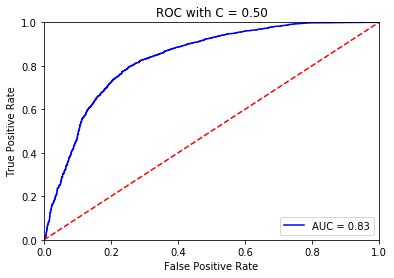

              precision    recall  f1-score   support

           0       0.75      0.60      0.66      2396
           1       0.80      0.89      0.84      4261

    accuracy                           0.78      6657
   macro avg       0.77      0.74      0.75      6657
weighted avg       0.78      0.78      0.78      6657

<bound method BaseLibSVM.fit of SVC(C=0.6, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>


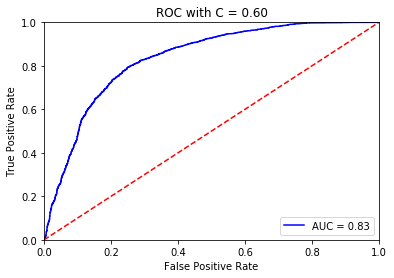

              precision    recall  f1-score   support

           0       0.75      0.60      0.66      2396
           1       0.80      0.89      0.84      4261

    accuracy                           0.78      6657
   macro avg       0.77      0.74      0.75      6657
weighted avg       0.78      0.78      0.78      6657

<bound method BaseLibSVM.fit of SVC(C=0.7, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>


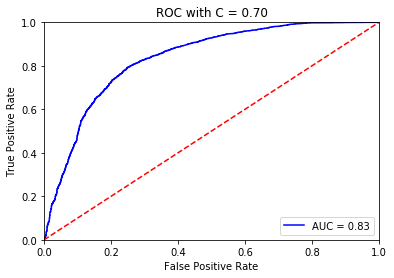

              precision    recall  f1-score   support

           0       0.75      0.59      0.66      2396
           1       0.80      0.89      0.84      4261

    accuracy                           0.78      6657
   macro avg       0.77      0.74      0.75      6657
weighted avg       0.78      0.78      0.78      6657

<bound method BaseLibSVM.fit of SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>


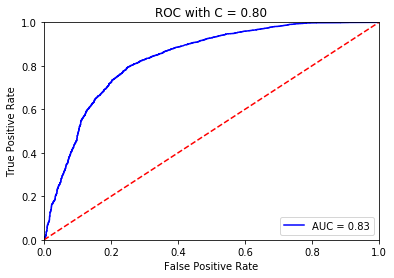

              precision    recall  f1-score   support

           0       0.75      0.60      0.66      2396
           1       0.80      0.89      0.84      4261

    accuracy                           0.78      6657
   macro avg       0.77      0.74      0.75      6657
weighted avg       0.78      0.78      0.78      6657

<bound method BaseLibSVM.fit of SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>


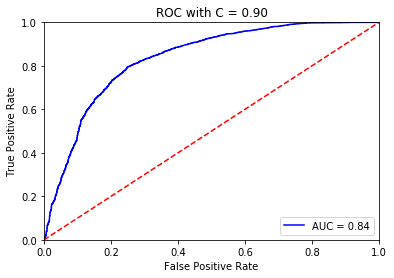

              precision    recall  f1-score   support

           0       0.75      0.60      0.66      2396
           1       0.80      0.89      0.84      4261

    accuracy                           0.78      6657
   macro avg       0.77      0.74      0.75      6657
weighted avg       0.78      0.78      0.78      6657

<bound method BaseLibSVM.fit of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>


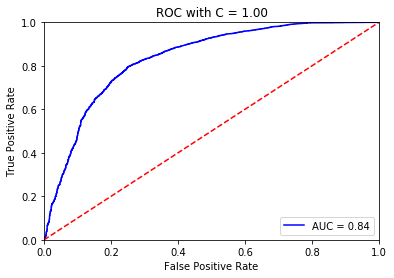

              precision    recall  f1-score   support

           0       0.75      0.59      0.66      2396
           1       0.80      0.89      0.84      4261

    accuracy                           0.78      6657
   macro avg       0.77      0.74      0.75      6657
weighted avg       0.78      0.78      0.78      6657

<bound method BaseLibSVM.fit of SVC(C=1.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>


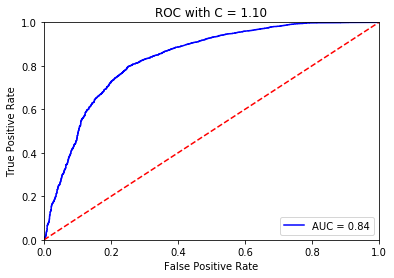

              precision    recall  f1-score   support

           0       0.75      0.60      0.66      2396
           1       0.80      0.89      0.84      4261

    accuracy                           0.78      6657
   macro avg       0.77      0.74      0.75      6657
weighted avg       0.78      0.78      0.78      6657

<bound method BaseLibSVM.fit of SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>


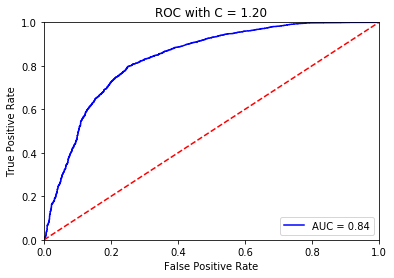

              precision    recall  f1-score   support

           0       0.75      0.59      0.66      2396
           1       0.80      0.89      0.84      4261

    accuracy                           0.78      6657
   macro avg       0.77      0.74      0.75      6657
weighted avg       0.78      0.78      0.78      6657

<bound method BaseLibSVM.fit of SVC(C=1.3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>


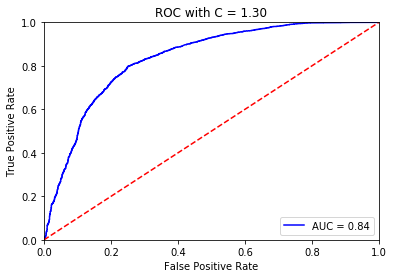

              precision    recall  f1-score   support

           0       0.75      0.59      0.66      2396
           1       0.80      0.89      0.84      4261

    accuracy                           0.78      6657
   macro avg       0.77      0.74      0.75      6657
weighted avg       0.78      0.78      0.78      6657

<bound method BaseLibSVM.fit of SVC(C=1.4, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>


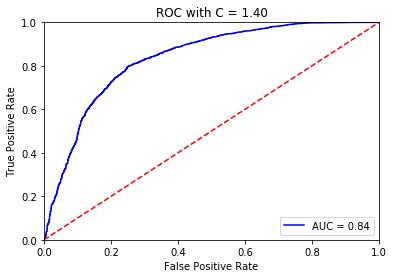

              precision    recall  f1-score   support

           0       0.75      0.59      0.66      2396
           1       0.80      0.89      0.84      4261

    accuracy                           0.78      6657
   macro avg       0.77      0.74      0.75      6657
weighted avg       0.78      0.78      0.78      6657



In [15]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
#svc = SVC(C=0.000001, gamma=0.000001, kernel='rbf')
#svc.fit(X_train, y_train)

#print("Accuracy on the training set: {:.3f}".format(svc.score(X_train, y_train)))
#print("Accuracy on the test set: {:.3f}".format(svc.score(X_test, y_test)))

#from sklearn.model_selection import GridSearchCV

#parameter_space = {'kernel':['rbf', 'linear'], 
 #             'C':[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4],
 #            'gamma':[0.000001, 0.1, 50, 1000]
#            }
#svc = svm.SVC()
#clf = GridSearchCV(svc, parameter_space, n_jobs=-1, cv=5)
#clf.fit(x_train, y_train)
#print('Best Paramaters are:\n', clf.best_params_)
#print('Best accuarcy are:\n', clf.best_score_)

C = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]

for C in C:
    svc = svm.SVC(C=C, kernel='linear', probability=True)
    model = svc.fit(x2_train, y2_train.values.ravel())
    print(svc.fit)
    pred_y = model.predict(x2_test)
    probs = svc.predict_proba(x2_test)
    preds = probs[:,1]

    fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('ROC with C = %0.2f' % C)
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1] , [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    for line in classification_report(y2_test, pred_y).split("\n"):
        print(line)


In [16]:
#from sklearn.svm import SVC
#algorithm = SVC(C=0000000.1)
#print(algorithm)
# train model
#model = algorithm.fit(x_train, y_train)
# make prediction
#pred_y = model.predict(x_test)
# print evaluation measures
#for line in classification_report(y_test, pred_y).split("\n"):
#    print(line)
#df2.head()

In [17]:
#from sklearn.svm import SVC
#algorithm = SVC(C=100000)
#print(algorithm)
# train model
#model = algorithm.fit(x_train, y_train)
# make prediction
#pred_y = model.predict(x_test)
# print evaluation measures
#for line in classification_report(y_test, pred_y).split("\n"):
#    print(line)

In [18]:
#from sklearn import svm
#from sklearn.svm import SVC
#from sklearn import metrics
#from sklearn.metrics import classification_report

#algorithm = SVC(C=0.1, gamma='auto', probability=True)
#model = algorithm.fit(x_train,y_train.values.ravel())
#pred_y = model.predict(x_test)
#print(algorithm)
#print(pred_y)
#probs = algorithm.predict_proba(x_test)
#preds = probs[:,1]

#fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
#roc_auc = metrics.auc(fpr, tpr)

#for line in classification_report(y_test, pred_y).split("\n"):
 #   print(line)

In [19]:
#trial = pd.DataFrame(pred_y)
#trial[0].value_counts()

In [20]:
#from sklearn import svm
#from sklearn.svm import SVC

#C = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]
#for C in C:
 #   svc = SVC(C=C, kernel='linear')
  #  model = svc.fit(x_train, y_train.values.ravel())
   # print(svc.fit)
#    pred_y = model.predict(x_test)
 #   probs = svc.predict_proba(x_test)
  #  preds = probs[:,1]
#
 #   fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
  #  roc_auc = metrics.auc(fpr, tpr)
   # 
    #plt.title('ROC with C=%0.2f' % C)
    #plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    #plt.legend(loc='lower right')
    #plt.plot([0,1] , [0,1], 'r--')
    #plt.xlim([0,1])
    #plt.ylim([0,1])
    #plt.ylabel('True Positive Rate')
    #plt.xlabel('False Positive Rate')
    #plt.show()

   # for line in classification_report(y_test, pred_y).split("\n"):
    #    print(line)

# Task 3

## 1)
##### There are several uses for validation and/or cross validation. Whether it is using the test train split approach or cross validation method. The training set is used to develop and construct models. The validation set or cross validation approach allows us to validate a given model to see how well it performs. For regression models, if the RMSE scores are both similar in the validation and training set then the model is generally not overfitted or underfitted. For classification, if the scores like accuracy are both close together between the validation set and training set then the model is not overfitted or underfitted. Therefore, validation and cross validation are used to validate models to see how they are performing and to identify overfitting or underfitting of the model. The validation set is not used in the building of the models so it helps validate the model. Also, hyper parameter tuning can be done to improve the model. In order to tell if the hyper parameters improved the model it is tested against the validation dataset. Lastly, the validation set is used when determining the model of choice. Whichever model has the optimal results between the training and validation scores, becomes the model of choice.  In summary, the validation set helps use detect over fitting and under fitting, and it validates the model by determining the optimal model and its given hyper parameters. 

## 2) 

##### Support Vector Machines (SVM) are often used in classification models but can also be used for regression analysis. The objective of a SVM model is to find a line in 2-dimensional space or a hyper-plane in 3-dimensional space or greater that distinctly separates the target data points. In other words, to correctly classify the class of the target variable on one side of the hyper-plane and the other class of the target variable on the other side of the hyper-plane. The hyper-plane separating the classes is known as the decision boundary. The purpose in SVM is to find hyper-planes that maximum the margin between the classes. Maximizing the margin between the classes creates greater confidence for separating future data points. The support vectors are influenced by the data points and use the data points to orientate the position of the hyper planes to identify the decision boundary between classes.  Any number of hyper-planes can be used to separate the classes. This can also occur for classification variables where the target has more than two classes. The dimensional space depends on the number of features used in the model.

## 3)

##### Often times in SVMs often have to use kernals to assist in seperating the data points into their specific classes.. When dealing with classification SVMs somestimes the data is not considered "linearly separable". When using kernals we are able to move to data to a higher dimension and possibly define hyper planes to create a decision boundary.

In [21]:
#pred_y = svc.predict(x_test)

#for line in classification_report(y_test, pred_y).split("\n"):
#    print(line)

In [22]:
#trial = pd.DataFrame(pred_y)
#trial[0].value_counts()

In [23]:
    #from sklearn import svm
    #from sklearn import metrics
    #from sklearn.metrics import classification_report
    #svc = svm.SVC(C=1.1, kernel='linear', probability=True)
    #model = svc.fit(x2_train, y2_train.values.ravel())
    #print(svc.fit)
    #pred_y = model.predict(x2_test)
    #probs = svc.predict_proba(x2_test)
    #preds = probs[:,1]

    #fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
    #roc_auc = metrics.auc(fpr, tpr)
    #for line in classification_report(y2_test, pred_y).split("\n"):
    #    print(line)